In [ ]:
from make_pooled_datasets import *
make_pooled_dataset('configs/3T_human_T1maps.json', '3T_human_T1maps')

In [2]:
from pathlib import Path
import pandas as pd
import json
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video
import glob
from src.plots import *

In [3]:
configFile = Path('configs/3T_human_T1maps.json')
data_folder_name = '3T_human_T1maps'

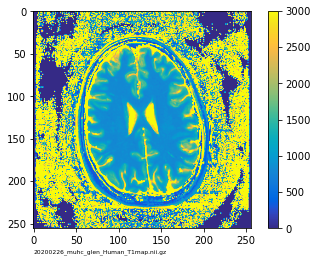

In [26]:
fig = plt.figure()
fig.set_facecolor("w")
vmin = 0
vmax = 3000

with open(configFile) as json_file:
    configJson = json.load(json_file)

id = 1
subid = 1
ims = []

for dataset_name in configJson:
    db_id = id+subid*0.001
    for key1 in configJson[dataset_name]:
        if key1 == 'datasets':
            for key2 in configJson[dataset_name][key1]:
                db_id = id+subid*0.001
                subid = subid+1
                    
                t1_file = configJson[dataset_name]['datasets'][key2]['imagePath']
                t1 = nib.load(Path(data_folder_name) / t1_file)
                t1_volume = t1.get_fdata() 

                # Handle 2D vs 3D case
                dims = t1_volume.shape

                if (len(dims) == 2) or (np.min(dims) == 1):
                    im = plt.imshow(np.rot90(t1_volume), cmap=parula_map, animated=True, vmin = vmin, vmax = vmax)
                else:
                    index_smallest_dim = np.argmin(dims)
                    numberOfSlices = dims[index_smallest_dim]
                    midSlice = int(np.round(numberOfSlices/2))

                    if index_smallest_dim == 0:
                        im = plt.imshow(np.rot90(np.squeeze(t1_volume[midSlice,:,:])), cmap=parula_map, animated=True, vmin = vmin, vmax = vmax)
                    elif index_smallest_dim == 1:
                        im = plt.imshow(np.rot90(np.squeeze(t1_volume[:,midSlice,:])), cmap=parula_map, animated=True, vmin = vmin, vmax = vmax)
                    elif index_smallest_dim == 2:
                        im = plt.imshow(np.rot90(np.squeeze(t1_volume[:,:,midSlice])), cmap=parula_map, animated=True, vmin = vmin, vmax = vmax)
                ttl = plt.text(0, 280, Path(t1_file).name, fontsize=6, horizontalalignment='left', verticalalignment='top')
                ims.append([im, ttl])

    # Increment dataset ID counter
    id = id + 1
    
    # Reset subdataset ID counter
    subid = 1

plt.colorbar()
plt.clim(vmin,vmax)
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=False,repeat_delay=1000)
ani.save('Human.gif', dpi=100, writer='imagemagick')